Predict Restaurant Rating

In [2]:
import pandas as pd
restaurant= pd.read_csv("dataset1.csv")
restaurant.head()

ModuleNotFoundError: No module named 'pandas'

In [3]:
restaurant.info()

NameError: name 'restaurant' is not defined

In [4]:
restaurant.describe()

NameError: name 'restaurant' is not defined

In [2]:
restaurant.isna().sum

NameError: name 'restaurant' is not defined

In [54]:
restaurant= restaurant.dropna()
restaurant.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [56]:
restaurant.shape

(9539, 21)

In [58]:
restaurant = restaurant.drop('Restaurant ID', axis=1)
restaurant = restaurant.drop('Restaurant Name', axis=1)
restaurant = restaurant.drop('Country Code', axis=1)
restaurant= restaurant.drop('City', axis=1)
restaurant = restaurant.drop('Address', axis=1)
restaurant = restaurant.drop('Locality', axis=1)
restaurant = restaurant.drop('Locality Verbose', axis=1)
restaurant = restaurant.drop('Longitude', axis=1)
restaurant = restaurant.drop('Latitude', axis=1)
restaurant = restaurant.drop('Cuisines', axis=1)
restaurant = restaurant.drop('Currency', axis=1)



In [60]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9539 entries, 0 to 9550
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  9539 non-null   int64  
 1   Has Table booking     9539 non-null   object 
 2   Has Online delivery   9539 non-null   object 
 3   Is delivering now     9539 non-null   object 
 4   Switch to order menu  9539 non-null   object 
 5   Price range           9539 non-null   int64  
 6   Aggregate rating      9539 non-null   float64
 7   Rating color          9539 non-null   object 
 8   Rating text           9539 non-null   object 
 9   Votes                 9539 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 819.8+ KB


MISSING ATTRIBUTES 

In [63]:
import numpy as np 
from sklearn.impute import SimpleImputer
num_cols = restaurant.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='median')
restaurant[num_cols] = imputer.fit_transform(restaurant[num_cols])

# Fill missing categorical values with mode
cat_cols = restaurant.select_dtypes(include='object').columns
restaurant[cat_cols] = restaurant[cat_cols].fillna(restaurant[cat_cols].mode().iloc[0])

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
restaurant['Has Table booking'] = le.fit_transform(restaurant['Has Table booking'])
restaurant['Has Online delivery'] = le.fit_transform(restaurant['Has Online delivery'])
restaurant['Is delivering now'] = le.fit_transform(restaurant['Is delivering now'])
restaurant['Switch to order menu'] = le.fit_transform(restaurant['Switch to order menu'])
restaurant['Rating color'] = le.fit_transform(restaurant['Rating color'])
restaurant['Rating text'] = le.fit_transform(restaurant['Rating text'])


In [67]:
restaurant

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100.0,1,0,0,0,3.0,4.8,0,1,314.0
1,1200.0,1,0,0,0,3.0,4.5,0,1,591.0
2,4000.0,1,0,0,0,4.0,4.4,1,5,270.0
3,1500.0,0,0,0,0,4.0,4.9,0,1,365.0
4,1500.0,1,0,0,0,4.0,4.8,0,1,229.0
...,...,...,...,...,...,...,...,...,...,...
9546,80.0,0,0,0,0,3.0,4.1,1,5,788.0
9547,105.0,0,0,0,0,3.0,4.2,1,5,1034.0
9548,170.0,0,0,0,0,4.0,3.7,5,2,661.0
9549,120.0,0,0,0,0,4.0,4.0,1,5,901.0


In [69]:
restaurant.shape

(9539, 10)

<Axes: xlabel='Aggregate rating'>

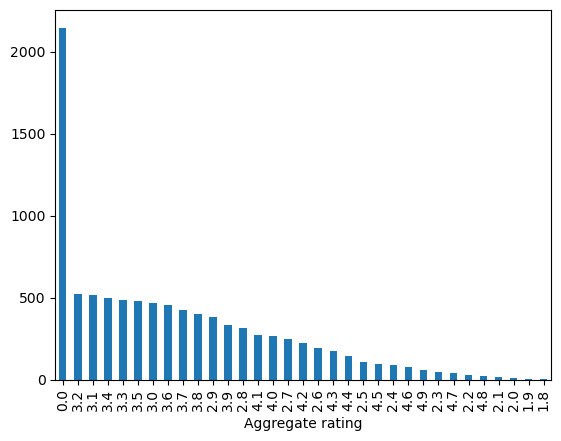

In [71]:
restaurant['Aggregate rating'].value_counts().plot(kind='bar')

<Axes: xlabel='Aggregate rating', ylabel='Count'>

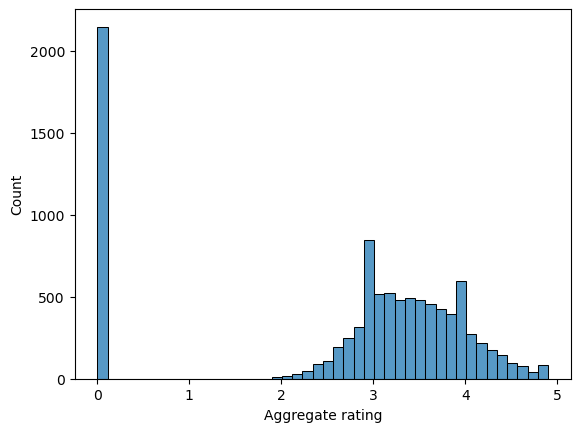

In [73]:
import seaborn as sns
sns.histplot(restaurant['Aggregate rating'])

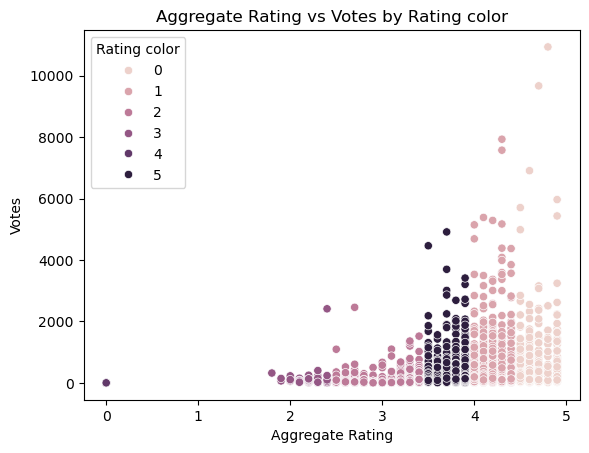

In [75]:
import matplotlib.pyplot as plt
sns.scatterplot(
    data=restaurant,
    x="Aggregate rating",
    y="Votes",
    hue="Rating color"
)
plt.title("Aggregate Rating vs Votes by Rating color")
plt.xlabel("Aggregate Rating")
plt.ylabel("Votes")
plt.legend(title="Rating color")
plt.show()
     


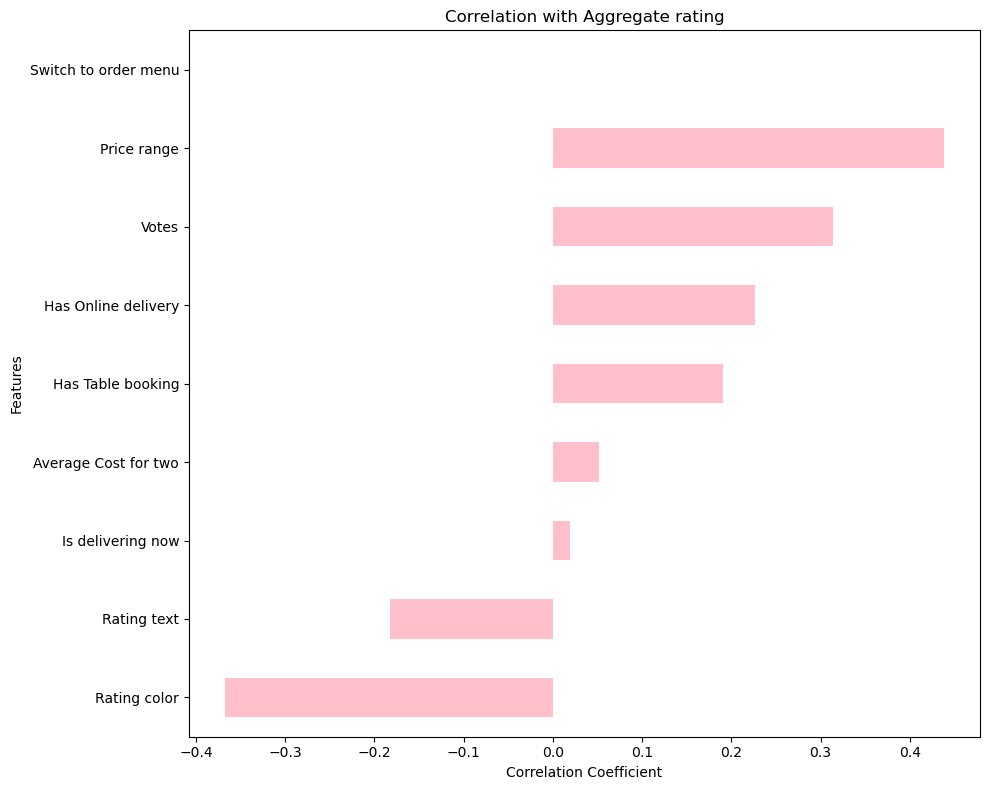

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
correlations = restaurant.corr()['Aggregate rating'].drop('Aggregate rating')

# Bar plot of correlations with 'Aggregate rating'
correlations.sort_values().plot(kind='barh', figsize=(10, 8), color='pink')
plt.title("Correlation with Aggregate rating")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [79]:
x = restaurant.drop('Aggregate rating', axis=1)
y = restaurant['Aggregate rating']

DATA SPLITTING

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=250)
x_train.head()
y_train.head()

5471    3.2
5791    0.0
7284    0.0
9283    4.1
5095    0.0
Name: Aggregate rating, dtype: float64

In [84]:
print("x_train: ", x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (7631, 9)
x_test:  (1908, 9)
y_train:  (7631,)
y_test:  (1908,)


TRAIN ON REGRESSION MODEL 

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#model = RandomForestRegressor()
#model=LinearRegression()
model = DecisionTreeRegressor()
model.fit(x_train,y_train)
model_pred=model.predict(x_test)
model_mse = mean_squared_error(y_test, model_pred)
model_r2 = r2_score(y_test, model_pred)
print(f"MSE of the decission tree regression model is: {model_mse:2f}")
print(f"R2 score of decision tree regression model is: {model_r2:2f}")
#print(f"MSE of the linear regression model is: {model_mse:2f}")
#print(f"R2 score of the linear regression model is: {model_r2:2f}")
#print(f"MSE of the random forest  regression model is: {model_mse:2f}")
#print(f"R2 score of the random forest regression model is: {model_r2:2f}")
     

MSE of the decission tree regression model is: 0.055714
R2 score of decision tree regression model is: 0.975684
